<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-02 03:10:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-05-02 03:10:25 (11.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

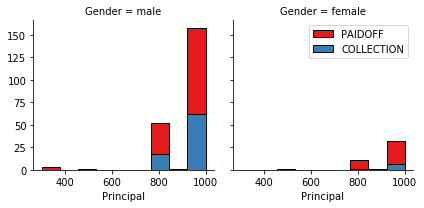

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

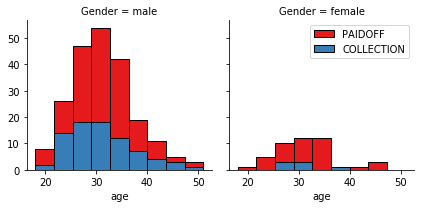

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

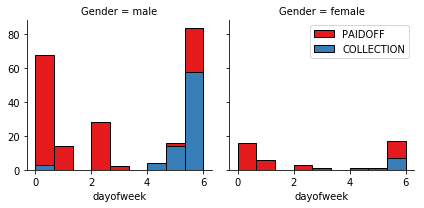

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
standScal = preprocessing.StandardScaler().fit(X)
X= standScal.transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
#Separation of the training data set betweeen training data set (80%) and the validation data set (20%)
from sklearn.model_selection import train_test_split
#Split of the training data set to separate 20% for the validation of the better k parameter
XTrain, XVal, yTrain, yVal = train_test_split(X, y, test_size=0.2)
print("len of validation data set: "+str(len(yVal)))
XVal.shape 
print("len of training data set: "+str(len(yTrain)))
XTrain.shape 

len of validation data set: 70
len of training data set: 276


(276, 8)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#Definition of the best k changing k from 1 to 20
kMax = 20
#Array to conserve the accuracy for each k model
kScore=np.zeros(kMax)
#Loop sobre each k value
for k in range(1, kMax+1):
    modelK = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto')
    modelK.fit(XTrain, yTrain)
    kScore[k-1]=modelK.score(XVal, yVal)
    print('Valid Mean Accuracy Model %d-Nearest with k: %f' %(k, kScore[k-1]))

Valid Mean Accuracy Model 1-Nearest with k: 0.685714
Valid Mean Accuracy Model 2-Nearest with k: 0.671429
Valid Mean Accuracy Model 3-Nearest with k: 0.700000
Valid Mean Accuracy Model 4-Nearest with k: 0.700000
Valid Mean Accuracy Model 5-Nearest with k: 0.700000
Valid Mean Accuracy Model 6-Nearest with k: 0.700000
Valid Mean Accuracy Model 7-Nearest with k: 0.700000
Valid Mean Accuracy Model 8-Nearest with k: 0.700000
Valid Mean Accuracy Model 9-Nearest with k: 0.671429
Valid Mean Accuracy Model 10-Nearest with k: 0.671429
Valid Mean Accuracy Model 11-Nearest with k: 0.685714
Valid Mean Accuracy Model 12-Nearest with k: 0.685714
Valid Mean Accuracy Model 13-Nearest with k: 0.685714
Valid Mean Accuracy Model 14-Nearest with k: 0.685714
Valid Mean Accuracy Model 15-Nearest with k: 0.685714
Valid Mean Accuracy Model 16-Nearest with k: 0.671429
Valid Mean Accuracy Model 17-Nearest with k: 0.714286
Valid Mean Accuracy Model 18-Nearest with k: 0.685714
Valid Mean Accuracy Model 19-Nearest 

The k-nearest with the higher mean accuracy 0.714286 is 17


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

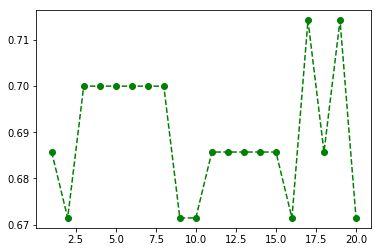

In [22]:
#Plot of the Valid Mean Accuracy in function of the k-nearest
plt.plot(range(1, kMax+1), kScore, 'go--')
#Selection of the k-nearest with higher mean accuracy
kVal=kScore.argmax()+1
print('The k-nearest with the higher mean accuracy %f is %d' %(kScore[kVal-1], kVal))
modelKNN = KNeighborsClassifier(n_neighbors=kVal, weights='uniform', algorithm='auto')
modelKNN.fit(XTrain, yTrain)


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#Definition of the best min_samples_split and min_samples_leaf changing these from 1 to 20
splitMax = 20
leafMax = 20
#Array to conserve the accuracy for each combination of min_samples_split and min_samples_leaf
splitLeafScore=np.zeros((splitMax, leafMax))
for s in range(2, splitMax+1):
    for l in range(1, leafMax+1):
        modelSplitLeaf=DecisionTreeClassifier(criterion='entropy', splitter='best', 
                             min_samples_split=s, min_samples_leaf=l)
        modelSplitLeaf.fit(XTrain, yTrain)
        splitLeafScore[s-1, l-1]=modelSplitLeaf.score(XVal, yVal)
        print('Valid Mean Accuracy Model with %d split and %d leaf: %f' %(s, l, splitLeafScore[s-1, l-1]))


Valid Mean Accuracy Model with 2 split and 1 leaf: 0.700000
Valid Mean Accuracy Model with 2 split and 2 leaf: 0.657143
Valid Mean Accuracy Model with 2 split and 3 leaf: 0.742857
Valid Mean Accuracy Model with 2 split and 4 leaf: 0.728571
Valid Mean Accuracy Model with 2 split and 5 leaf: 0.728571
Valid Mean Accuracy Model with 2 split and 6 leaf: 0.714286
Valid Mean Accuracy Model with 2 split and 7 leaf: 0.728571
Valid Mean Accuracy Model with 2 split and 8 leaf: 0.671429
Valid Mean Accuracy Model with 2 split and 9 leaf: 0.700000
Valid Mean Accuracy Model with 2 split and 10 leaf: 0.685714
Valid Mean Accuracy Model with 2 split and 11 leaf: 0.685714
Valid Mean Accuracy Model with 2 split and 12 leaf: 0.685714
Valid Mean Accuracy Model with 2 split and 13 leaf: 0.642857
Valid Mean Accuracy Model with 2 split and 14 leaf: 0.671429
Valid Mean Accuracy Model with 2 split and 15 leaf: 0.671429
Valid Mean Accuracy Model with 2 split and 16 leaf: 0.671429
Valid Mean Accuracy Model with 2 

Valid Mean Accuracy Model with 12 split and 14 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 15 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 16 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 17 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 18 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 19 leaf: 0.671429
Valid Mean Accuracy Model with 12 split and 20 leaf: 0.671429
Valid Mean Accuracy Model with 13 split and 1 leaf: 0.728571
Valid Mean Accuracy Model with 13 split and 2 leaf: 0.685714
Valid Mean Accuracy Model with 13 split and 3 leaf: 0.728571
Valid Mean Accuracy Model with 13 split and 4 leaf: 0.728571
Valid Mean Accuracy Model with 13 split and 5 leaf: 0.728571
Valid Mean Accuracy Model with 13 split and 6 leaf: 0.714286
Valid Mean Accuracy Model with 13 split and 7 leaf: 0.728571
Valid Mean Accuracy Model with 13 split and 8 leaf: 0.700000
Valid Mean Accuracy Model with 13 split and 9 leaf: 0.700000
Valid Mean Accura

In [25]:
#Selection of the min samples split and min samples leaf parameters with higher mean accuracy
ind = np.unravel_index(splitLeafScore.argmax(axis=None), splitLeafScore.shape)
splitVal=ind[0]+1
leafVal=ind[1]+1
accTreeMod=splitLeafScore[splitVal-1, leafVal-1]
print('The Tree Model with the higher mean accuracy %f has %d min samples split and %d min samples leaf' 
      %(accTreeMod, splitVal, leafVal))
modelTree=DecisionTreeClassifier(criterion='entropy', splitter='best', 
                             min_samples_split=splitVal, min_samples_leaf=leafVal)
modelTree.fit(XTrain, yTrain)

The Tree Model with the higher mean accuracy 0.742857 has 2 min samples split and 3 min samples leaf


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [26]:
from sklearn import svm

Valid Mean Accuracy Model with C Penality 0.100000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.200000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.300000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.400000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.500000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.600000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.700000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.800000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.900000 is 0.714286
Valid Mean Accuracy Model with C Penality 1.000000 is 0.714286
Valid Mean Accuracy Model with C Penality 1.100000 is 0.700000
Valid Mean Accuracy Model with C Penality 1.200000 is 0.685714
Valid Mean Accuracy Model with C Penality 1.300000 is 0.685714
Valid Mean Accuracy Model with C Penality 1.400000 is 0.685714
Valid Mean Accuracy Model with C Penality 1.500000 is 0.685714
Valid Mean Accuracy Model with C Penality 1.600000 is 0

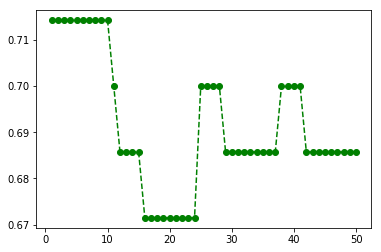

In [27]:
#Definition of the best C penality parameter from 0.1 to 5
cMax = 50 #multiplicado por 10 para facilitar o loop
#Array to conserve the accuracy for each k model
cScore=np.zeros(cMax)
#Loop sobre each c value
for c in range(1, cMax+1):
    modelC = svm.SVC(C=c/10, kernel='rbf', gamma='auto', max_iter=-1)
    modelC.fit(XTrain, yTrain)
    cScore[c-1]=modelC.score(XVal, yVal)
    print('Valid Mean Accuracy Model with C Penality %f is %f' %(c/10, cScore[c-1]))
#Plot of the Valid Mean Accuracy in function of the k-nearest
plt.plot(range(1, cMax+1), cScore, 'go--')

In [28]:
#Selection of the C penality parameter with higher mean accuracy
cVal=(cScore.argmax()+1)/10
accSVCMod = cScore[int(cVal*10-1)]
print('The C penality parameter with the higher mean accuracy %f is %f' %(accSVCMod, cVal))
modelSVM = svm.SVC(C=c/10, kernel='rbf', gamma='auto', max_iter=-1)
modelSVM.fit(XTrain, yTrain)



The C penality parameter with the higher mean accuracy 0.714286 is 0.100000


SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#Definition of the best C penality parameter from 0.01 to 5
cMax = 500 #multiplicado por 100 para facilitar o loop
#Array to conserve the accuracy for each C penality value
cScore=np.zeros(cMax)
#Loop sobre each c value
for c in range(1, cMax+1):
    modelC=LogisticRegression(C=c/100, solver='liblinear',max_iter=10000)
    modelC.fit(XTrain, yTrain)
    cScore[c-1]=modelC.score(XVal, yVal)
    print('Valid Mean Accuracy Model with C Penality %f is %f' %(c/100, cScore[c-1]))


Valid Mean Accuracy Model with C Penality 0.010000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.020000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.030000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.040000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.050000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.060000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.070000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.080000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.090000 is 0.714286
Valid Mean Accuracy Model with C Penality 0.100000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.110000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.120000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.130000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.140000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.150000 is 0.700000
Valid Mean Accuracy Model with C Penality 0.160000 is 0

Valid Mean Accuracy Model with C Penality 1.410000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.420000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.430000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.440000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.450000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.460000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.470000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.480000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.490000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.500000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.510000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.520000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.530000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.540000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.550000 is 0.728571
Valid Mean Accuracy Model with C Penality 1.560000 is 0

Valid Mean Accuracy Model with C Penality 3.150000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.160000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.170000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.180000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.190000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.200000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.210000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.220000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.230000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.240000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.250000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.260000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.270000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.280000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.290000 is 0.714286
Valid Mean Accuracy Model with C Penality 3.300000 is 0

Valid Mean Accuracy Model with C Penality 4.910000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.920000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.930000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.940000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.950000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.960000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.970000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.980000 is 0.714286
Valid Mean Accuracy Model with C Penality 4.990000 is 0.714286
Valid Mean Accuracy Model with C Penality 5.000000 is 0.714286


The C penality parameter with the higher mean accuracy 0.728571 is 0.610000


LogisticRegression(C=0.61, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

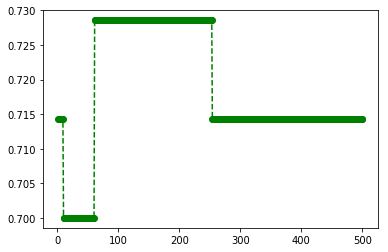

In [31]:
#Plot of the Valid Mean Accuracy in function of the k-nearest
plt.plot(range(1, cMax+1), cScore, 'go--')
#Selection of the C penality parameter with higher mean accuracy
cVal=(cScore.argmax()+1)/100
accLRMod = cScore[int(cVal*100-1)]
print('The C penality parameter with the higher mean accuracy %f is %f' %(accLRMod, cVal))
modelLR=LogisticRegression(C=cVal, solver='liblinear',max_iter=10000)
modelLR.fit(XTrain, yTrain)

# Model Evaluation using Test set

In [32]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [33]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-02 03:13:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-02 03:13:32 (281 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [34]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [35]:
#Preparation of the test data set like it has been done for the training data set
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df[['Principal','terms','age','Gender','education']].head()

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

XTest = Feature
XTest[0:5]
yTest = test_df['loan_status'].values
yTest[0:5]
XTest= standScal.transform(XTest)
XTest[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


array([[ 0.51578458,  0.92071769,  3.16061891,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [-5.89052444, -1.96168647,  0.67333883, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.86968108],
       [ 0.51578458,  0.92071769,  1.9998882 ,  2.37778177,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.81902922, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.3215732 , -0.42056004,  0.82934003,
         2.61985426, -0.87997669, -0.86968108]])

In [36]:
#Evaluation of each model with the best hiperparameters defined during the training
#KNN Model
accJacKNN=jaccard_similarity_score(y_true=yTest, y_pred=modelKNN.predict(XTest))
accF1KNN=f1_score(y_true=yTest, y_pred=modelKNN.predict(XTest), average='weighted')

#Tree Model
accJacTree=jaccard_similarity_score(y_true=yTest, y_pred=modelTree.predict(XTest))
accF1Tree=f1_score(y_true=yTest, y_pred=modelTree.predict(XTest), average='weighted')

#SVM
accJacSVM=jaccard_similarity_score(y_true=yTest, y_pred=modelSVM.predict(XTest))
accF1SVM=f1_score(y_true=yTest, y_pred=modelSVM.predict(XTest), average='weighted')

#LR
accJacLR=jaccard_similarity_score(y_true=yTest, y_pred=modelLR.predict(XTest))
accF1LR=f1_score(y_true=yTest, y_pred=modelLR.predict(XTest), average='weighted')

yhat_probab = modelLR.predict_proba(XTest)
accLossLR = log_loss(y_true=yTest, y_pred=yhat_probab)

In [37]:
#Reporting
report = pd.DataFrame()
report["Algorithm"]=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression']
report["Jaccard"]=[accJacKNN, accJacTree, accJacSVM, accJacLR]
report["F1-score"]=[accF1KNN, accF1Tree, accF1SVM, accF1LR]
report["LogLoss"]=[np.NaN, np.NaN, np.NaN, accLossLR]
report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.740741,0.660427,NaN
1,Decision Tree,0.685185,0.660225,NaN
2,SVM,0.740741,0.725309,NaN
3,LogisticRegression,0.759259,0.671764,0.472762


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>